# <font color=blue>Solutions for "Data Exploration - Univariate Analysis"</font>

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

education_df = pd.read_csv('../data/states_all.csv')

In [2]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

education_df.dropna(inplace=True)

**(1)** Interpret the data by making univariate analysis and indicate the points you consider important.

In [3]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,...,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00,466.00
mean,2008.58,944482.97,10815190.94,958023.14,5011698.85,4845468.93,10898488.56,5650707.53,3188073.77,492247.86,...,72531.35,72920.95,64806.42,583730.14,286784.15,893511.70,236.91,279.80,219.51,263.79
std,5.78,1122384.19,13582352.73,1331475.09,6411774.48,6338172.35,13758732.94,7262925.42,3840561.13,601454.09,...,86460.44,85834.65,77546.86,692537.50,340795.79,1060033.24,8.70,9.38,7.43,6.88
min,1996.00,44179.00,678874.00,57870.00,0.00,28531.00,703245.00,318260.00,204117.00,23107.00,...,3423.00,2860.00,2188.00,26762.00,9970.00,36823.00,187.13,232.83,181.63,236.38
25%,2005.00,277437.00,2712659.50,261447.00,1491747.25,963555.75,2670299.75,1416288.25,847229.50,129651.50,...,20489.75,20880.25,18527.75,166639.50,81944.00,259627.75,232.76,274.71,215.34,259.66
50%,2009.00,665944.50,6139972.00,560135.00,3034959.50,2467272.50,6317938.00,3193509.00,1908255.00,330406.50,...,50918.00,50114.50,41790.00,408357.00,187118.00,628208.50,238.39,281.53,221.13,265.22
75%,2013.00,1018588.00,12224068.50,1040284.50,6260626.75,5488079.25,11959506.00,6154768.50,3667420.00,566654.75,...,79929.50,80949.75,75641.25,642495.25,323491.50,975862.50,242.60,286.20,224.53,268.31
max,2017.00,6307022.00,89217262.00,9990221.00,50904567.00,36105265.00,85320133.00,43964520.00,26058021.00,3995951.00,...,493415.00,500143.00,498403.00,3929869.00,2011865.00,5926631.00,253.42,300.57,236.77,280.50


- Average *TOTAL_REVENUE* is less than *TOTAL_EXPENDITURE*. This means that states run budget deficit on education on average.

- *INSTRUCTION_EXPENDITURE* makes up almost half of the total expenditures on education.

- *FEDERAL_REVENUE* is the major source of revenue on average.

- Average math scores are higher than average reading scores but the standard deviation of the average math scores is also higher than the that of the average reading scores.

**(2)** Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?

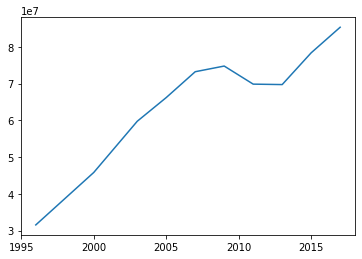

In [4]:
x = education_df[education_df.STATE == "CALIFORNIA"]['YEAR']
y = education_df[education_df.STATE == "CALIFORNIA"]['TOTAL_EXPENDITURE']

plt.plot(x,y)
plt.show()

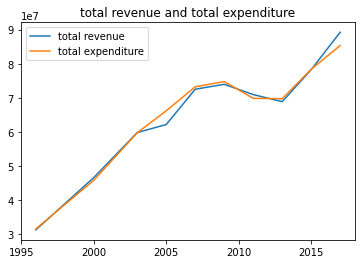

In [5]:
plt.plot(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "TOTAL_REVENUE"], label="total revenue")

plt.plot(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "TOTAL_EXPENDITURE"], label="total expenditure")

plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

**(3)** In which course are students more successful in your chosen state? Mathematics or reading?

In [6]:
education_df["dif_4"] = education_df.AVG_READING_4_SCORE - education_df.AVG_MATH_4_SCORE
education_df["dif_8"] = education_df.AVG_READING_8_SCORE - education_df.AVG_MATH_8_SCORE

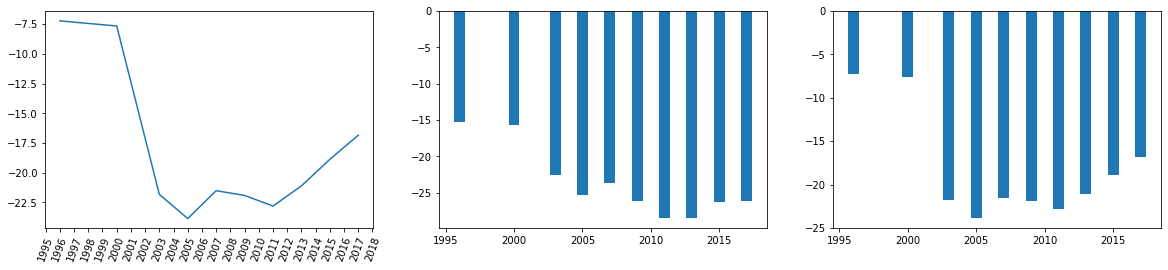

In [7]:
x = education_df[education_df.STATE == "CALIFORNIA"][['YEAR', 'dif_4']].dropna().YEAR
y = education_df[education_df.STATE == "CALIFORNIA"][['YEAR', 'dif_4']].dropna().dif_4

plt.figure(figsize=(20,4))

plt.subplot(131)
plt.plot(x,y)
plt.xticks(range(1995, 2019), rotation=70)

plt.subplot(132)
plt.bar(education_df.YEAR, education_df.dif_4)

plt.subplot(133)
plt.bar(education_df[education_df.STATE == "CALIFORNIA"].YEAR, education_df[education_df.STATE == "CALIFORNIA"].dif_4)

plt.show()

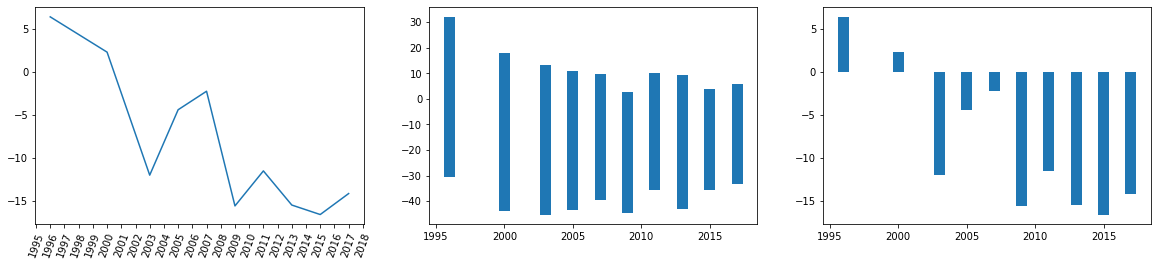

In [8]:
x = education_df[education_df.STATE == "CALIFORNIA"][['YEAR', 'dif_8']].dropna().YEAR
y = education_df[education_df.STATE == "CALIFORNIA"][['YEAR', 'dif_8']].dropna().dif_8

plt.figure(figsize=(20,4))

plt.subplot(131)
plt.plot(x,y)
plt.xticks(range(1995, 2019), rotation=70)

plt.subplot(132)
plt.bar(education_df.YEAR, education_df.dif_8)

plt.subplot(133)
plt.bar(education_df[education_df.STATE == "CALIFORNIA"].YEAR, education_df[education_df.STATE == "CALIFORNIA"].dif_8)

plt.show()

**(4)** What is the distribution of mathematics and reading grades?

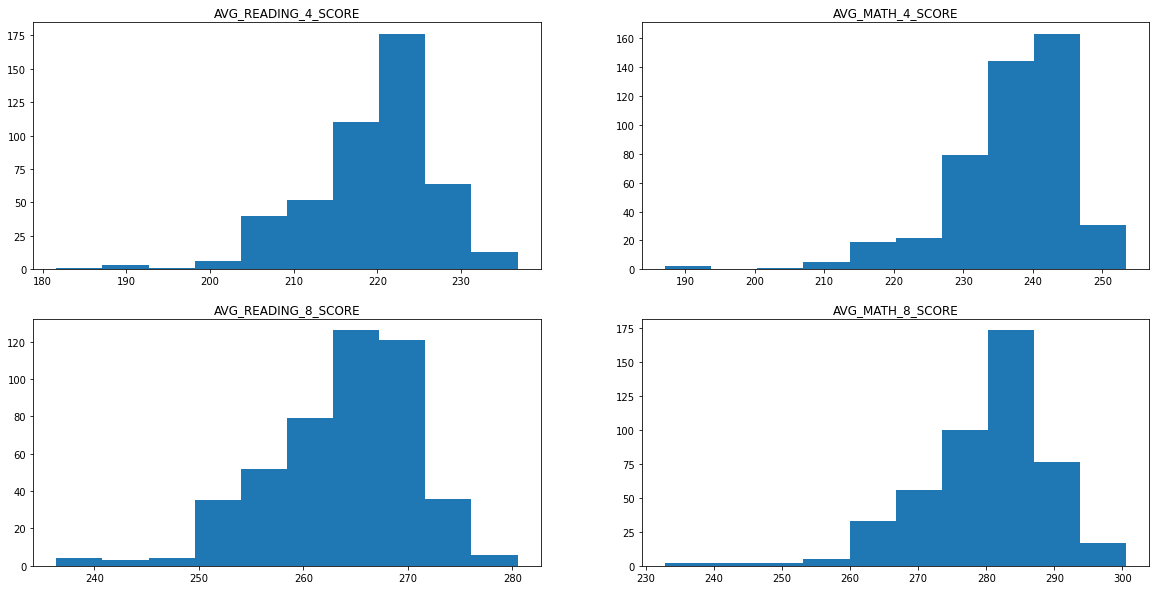

In [9]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("{}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("{}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("{}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("{}".format("AVG_MATH_8_SCORE"))
plt.show()

- The distributions are not normal distribution but slightly skewed to the left both for reading and writing. This means that average of the scores are lower than the median.

**(5)** You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.

In [10]:
education_df = pd.read_csv('../data/states_all.csv')
columns = ['AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE']

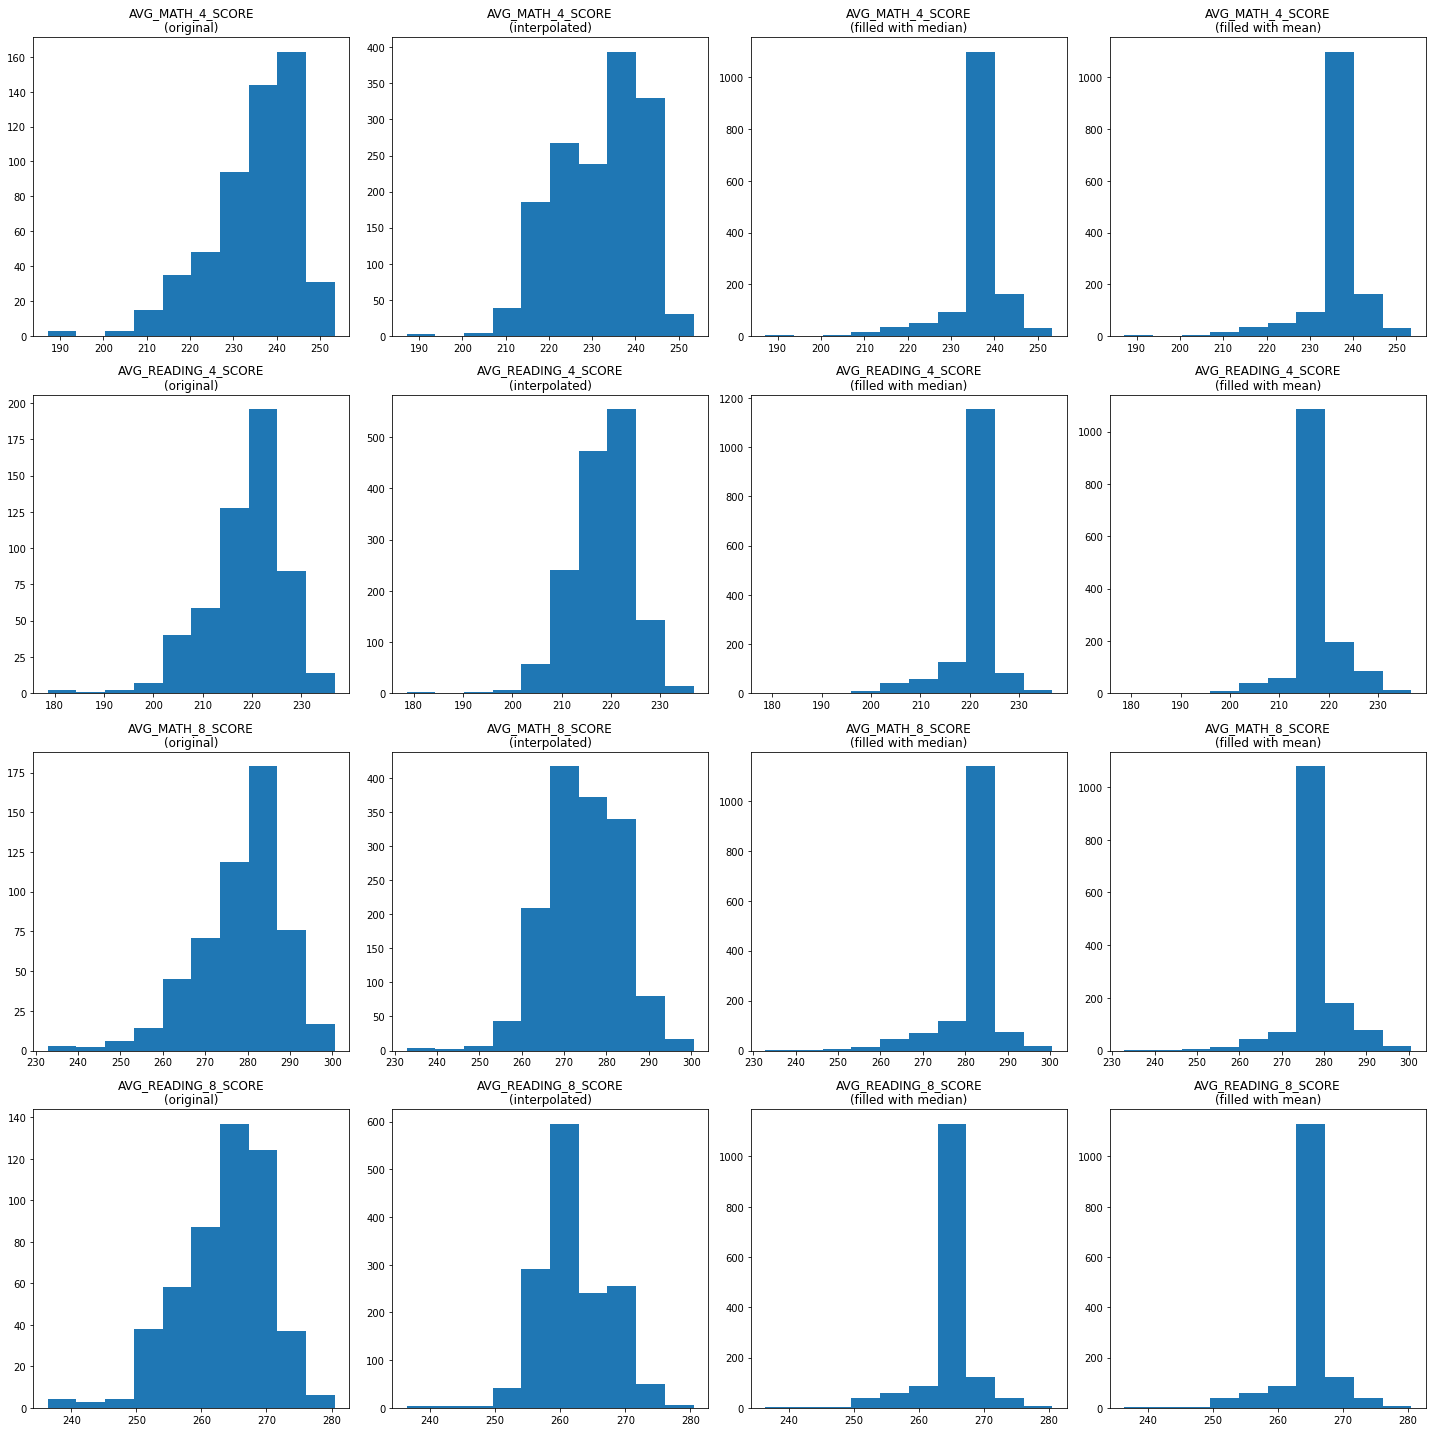

In [11]:
plt.figure(figsize=(20,20))

for i, col in enumerate(columns):
    original_df = education_df[col].dropna()
    interpolate_df = education_df.loc[:, col].interpolate()
    median_df = education_df.loc[:, col].fillna(education_df[col].median())
    mean_df = education_df.loc[:, col].fillna(education_df[col].mean())
    
    plt.subplot(4,4, i*4 + 1)
    plt.hist(original_df)
    plt.title("{}\n(original)".format(col))
    
    plt.subplot(4,4, i*4 + 2)
    plt.hist(interpolate_df)
    plt.title("{}\n(interpolated)".format(col))
    
    plt.subplot(4,4, i*4 + 3)
    plt.hist(median_df)
    plt.title("{}\n(filled with median)".format(col))
    
    plt.subplot(4,4, i*4 + 4)
    plt.hist(mean_df)
    plt.title("{}\n(filled with mean)".format(col))
    
plt.tight_layout()
plt.show()

- The technique for filling in the missing values substantially affects the distributions of the variables. Especially in our case, filling with mean or median has the strongest effect. This is probably due to the fact that we have a lot of missing values in our data. 

- The change in the distribution might have some serious effects on our model results. Hence, instead of filling in the missing values with mean or median, we may fill them in using interpolation or we may just discard the missing values.